# Data Visualisation -  Individual project


## Gender Equality in European Union Countries 


#### Daniela Nogueira

January, 2022

## 1. Research topic

We know that women have had fewer opportunities for economic participation than men for many years, including poorer access to basic and higher education, and less political representation, to name a few examples. In addition, many debates have taken place on this topic, and many governments and organisations have taken steps to close the gender gap. The United Nations General Assembly, for example, created UN Women,  the United Nations Entity for Gender Equality and the Empowerment of Women, in July 2010. In doing so, UN Member States took step forward in promoting  gender equality and women's empowerment. I decided to carry out a project that focuses specifically on this topic, gender equality, in order to comprehend the differences between females and males in the job market as well as in education over time in the countries of the European Union.

#### This project aims to explore the gender statistics in the European Union and understand:

1. What is the gender distribution of Labor Force Participation in the European Union's different countries? What has been the tendency over the time?

2. Is there a trend for females to assume roles of employers and self-employed labourers throughout the time? And compared to males?

3. Which European Union's countries have the largest and lowest employment and earnings discrepancies between genders? What has been the trend throughout the time?

4. Is there a gap in unemployment rates between males and females? What about advanced education level?


## 2. Data

Regarding data collection, I used data from three distinct sources to acquire the information I needed to answer my research questions. The first source is a gender statistics database provided by "The World Bank Group," an international organisation made up of five organisations that provide free and open access to collections of  time series data on a variety of topics. The second source is a database of data on gender equality provided by "Eurostat," the European Union's statistical institute, with a focus on earnings and social inclusion. Finally, the third resource is the website https://www.worldometers.info/geography/how-many-countries-in-europe/ which I extracted information about each European Union's country geographic position, a relevant information for my future analysis, using Web Scraping techniques. With the exception of this last source, all databases were extracted in excel format.

In terms of the statistical indicators that I pulled from these databases, I only extracted data on countries for the years 2012 to 2019, because many indicators and countries had missing data for periods before to 2012 and after 2019. However, because 2020 and 2021 were exceptional years due to the COVID-19 pandemic, I believe the data gathered, while not up to date, is reliable for inferring trends and answering my research questions.

Finally, the designations and definitions of the statistical indicators in my final dataframe, which I will analyse during this project, can be found in the pdf document "Indicators definitions.pdf," which is located in the project folder.

## 2.1. Data Preprocessing and Cleaning 

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import matplotlib as mpl
import requests
from bs4 import BeautifulSoup
import plotly.express as px
import circlify
import warnings
warnings.filterwarnings("ignore")

### 2.1.1. First source 

In [2]:
#Read dataframe
gender_statistics = pd.read_excel('Data_Extract_From_Gender_Statistics.xlsx', nrows=351) 
gender_statistics.head()

Series Name        Series Code  \
0  Employers, female (% of female employment) (mo...  SL.EMP.MPYR.FE.ZS   
1  Employers, female (% of female employment) (mo...  SL.EMP.MPYR.FE.ZS   
2  Employers, female (% of female employment) (mo...  SL.EMP.MPYR.FE.ZS   
3  Employers, female (% of female employment) (mo...  SL.EMP.MPYR.FE.ZS   
4  Employers, female (% of female employment) (mo...  SL.EMP.MPYR.FE.ZS   

  Country Name Country Code 2012 [YR2012] 2013 [YR2013] 2014 [YR2014]  \
0      Austria          AUT          2.34          2.27          2.42   
1      Belgium          BEL          2.07          2.27          2.36   
2     Bulgaria          BGR           2.2          2.27          2.21   
3      Croatia          HRV          2.94          2.44           3.1   
4       Cyprus          CYP          1.37          1.26          0.96   

  2015 [YR2015] 2016 [YR2016]  2017 [YR2017]  2018 [YR2018] 2019 [YR2019]  
0          2.46          2.53           2.64           2.50          2.54  
1          2.38          2.34           2.49           2.23          2.07  
2          1.96          2.11           2.20           2.14          2.12  
3          3.24          3.38           3.29           3.37          3.07  
4          0.93           0.7           0.78           0.86          1.14

In [3]:
#Create a dataframe with iso codes to use later
iso_codes = gender_statistics[['Country Name','Country Code']]

In [4]:
#Drop unnecessary columns
gender_statistics.drop(columns=['Series Code','Country Code'], axis=1,inplace=True)

In [5]:
gender_statistics.columns

Index(['Series Name', 'Country Name', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]'],
      dtype='object')

In [6]:
#Rename countries columns
gender_statistics.rename(columns={'Series Name':'Indicators', 'Country Name':'Country', '2012 [YR2012]':2012 , '2013 [YR2013]':2013,
       '2014 [YR2014]':2014, '2015 [YR2015]':2015, '2016 [YR2016]':2016, '2017 [YR2017]':2017,
       '2018 [YR2018]':2018, '2019 [YR2019]':2019}, inplace=True)

In [7]:
#Melt columns into rows
gender_statistics = gender_statistics.melt(id_vars=['Indicators', 'Country'],
             var_name='Year', value_name='Statistics')
gender_statistics.head()

Indicators   Country  Year  \
0  Employers, female (% of female employment) (mo...   Austria  2012   
1  Employers, female (% of female employment) (mo...   Belgium  2012   
2  Employers, female (% of female employment) (mo...  Bulgaria  2012   
3  Employers, female (% of female employment) (mo...   Croatia  2012   
4  Employers, female (% of female employment) (mo...    Cyprus  2012   

  Statistics  
0       2.34  
1       2.07  
2        2.2  
3       2.94  
4       1.37

In [8]:
#verify existence of null values
gender_statistics.isnull().sum()

Indicators    0
Country       0
Year          0
Statistics    0
dtype: int64

#### During the data extraction, I found that some indicators, very few, had a lack of information in some years for some countries, which was represented by "'..". I decided to keep these indicators as they were relevant to my analysis and eliminate only the countries that had missing values for these specific indicators (School enrollment, tertiary and Unemployment with advanced education, male).

In [9]:
#Verify ".."
gender_statistics.loc[gender_statistics['Statistics'] == '..']

Indicators      Country  Year  \
118               School enrollment, tertiary (% gross)      Germany  2012   
476               School enrollment, tertiary (% gross)   Luxembourg  2013   
478               School enrollment, tertiary (% gross)  Netherlands  2013   
827               School enrollment, tertiary (% gross)   Luxembourg  2014   
829               School enrollment, tertiary (% gross)  Netherlands  2014   
1172              School enrollment, tertiary (% gross)       Greece  2015   
1314  Unemployment with advanced education, male (% ...        Malta  2015   
1665  Unemployment with advanced education, male (% ...        Malta  2016   
2584              School enrollment, tertiary (% gross)  Netherlands  2019   

     Statistics  
118          ..  
476          ..  
478          ..  
827          ..  
829          ..  
1172         ..  
1314         ..  
1665         ..  
2584         ..

In [10]:
#Eliminate only the countries that had missing values for specific indicators
gender_statistics = gender_statistics.drop(gender_statistics[(gender_statistics['Indicators'] == 'School enrollment, tertiary (% gross)') & (gender_statistics['Country'] == 'Netherlands')].index)
gender_statistics = gender_statistics.drop(gender_statistics[(gender_statistics['Indicators'] == 'School enrollment, tertiary (% gross)') & (gender_statistics['Country'] == 'Greece')].index)
gender_statistics = gender_statistics.drop(gender_statistics[(gender_statistics['Indicators'] == 'School enrollment, tertiary (% gross)') & (gender_statistics['Country'] == 'Germany')].index)
gender_statistics = gender_statistics.drop(gender_statistics[(gender_statistics['Indicators'] == 'School enrollment, tertiary (% gross)') & (gender_statistics['Country'] == 'Luxembourg')].index)
gender_statistics = gender_statistics.drop(gender_statistics[(gender_statistics['Indicators'] == 'Unemployment with advanced education, male (% of male labor force with advanced education)') & (gender_statistics['Country'] == 'Malta')].index)

gender_statistics.reset_index(inplace=True,drop=True)
gender_statistics.head()

Indicators   Country  Year  \
0  Employers, female (% of female employment) (mo...   Austria  2012   
1  Employers, female (% of female employment) (mo...   Belgium  2012   
2  Employers, female (% of female employment) (mo...  Bulgaria  2012   
3  Employers, female (% of female employment) (mo...   Croatia  2012   
4  Employers, female (% of female employment) (mo...    Cyprus  2012   

  Statistics  
0       2.34  
1       2.07  
2        2.2  
3       2.94  
4       1.37

In [11]:
#Shape
gender_statistics.shape

(2768, 4)

### 2.1.2. Second source

In [12]:
#Get"Gender pay gap in unadjusted form" indicator
gender_pay_gap = pd.read_excel('Gender pay gap in unadjusted form.xlsx',sheet_name='Sheet 1', usecols =[0,5,7,9,11,13,15,17,19], nrows=24, skiprows=8) 
gender_pay_gap['Indicators'] = 'Gender pay gap in unadjusted form'
gender_pay_gap.drop(0, axis=0, inplace = True)
gender_pay_gap.rename(columns={'TIME':'Country'}, inplace=True)
gender_pay_gap = gender_pay_gap[['Country','Indicators','2012','2013','2014','2015','2016','2017','2018','2019']]
gender_pay_gap.reset_index(inplace=True,drop=True)

# melt columns into rows
gender_pay_gap = gender_pay_gap.melt(id_vars=['Indicators', 'Country'],
             var_name='Year', value_name='Statistics')
gender_pay_gap.head()


Indicators  \
0  Gender pay gap in unadjusted form   
1  Gender pay gap in unadjusted form   
2  Gender pay gap in unadjusted form   
3  Gender pay gap in unadjusted form   
4  Gender pay gap in unadjusted form   

                                            Country  Year  Statistics  
0                                           Belgium  2012         8.3  
1                                          Bulgaria  2012        15.1  
2                                           Denmark  2012        16.8  
3  Germany (until 1990 former territory of the FRG)  2012        22.7  
4                                           Estonia  2012        29.9

In [13]:
#Get"Gender employment gap" indicator
gender_employment_gap = pd.read_excel('Gender employment gap.xlsx',sheet_name='Sheet 1', usecols = [0,1,3,5,7,9,11,13,15,17,19], nrows=28, skiprows=9) 
gender_employment_gap['Indicators'] = 'Gender employment gap'
gender_employment_gap.drop(0, axis=0, inplace = True)
gender_employment_gap.rename(columns={'TIME':'Country'}, inplace=True)
gender_employment_gap=gender_employment_gap[['Country','Indicators','2012','2013','2014','2015','2016','2017','2018','2019']]
gender_employment_gap.reset_index(inplace=True,drop=True)

# melt columns into rows
gender_employment_gap = gender_employment_gap.melt(id_vars=['Indicators', 'Country'],
             var_name='Year', value_name='Statistics')
gender_employment_gap.head()


Indicators                                           Country  \
0  Gender employment gap                                           Belgium   
1  Gender employment gap                                          Bulgaria   
2  Gender employment gap                                           Czechia   
3  Gender employment gap                                           Denmark   
4  Gender employment gap  Germany (until 1990 former territory of the FRG)   

   Year  Statistics  
0  2012        11.0  
1  2012         5.9  
2  2012        17.7  
3  2012         6.4  
4  2012        10.5

### Concatenate de dataframes from first and second sources 

In [14]:
#Concat the dataframes  
gender_statistics=pd.concat([gender_statistics,gender_pay_gap, gender_employment_gap])
gender_statistics.reset_index(drop=True,inplace=True)
gender_statistics

Indicators   Country  Year  \
0     Employers, female (% of female employment) (mo...   Austria  2012   
1     Employers, female (% of female employment) (mo...   Belgium  2012   
2     Employers, female (% of female employment) (mo...  Bulgaria  2012   
3     Employers, female (% of female employment) (mo...   Croatia  2012   
4     Employers, female (% of female employment) (mo...    Cyprus  2012   
...                                                 ...       ...   ...   
3163                              Gender employment gap   Romania  2019   
3164                              Gender employment gap  Slovenia  2019   
3165                              Gender employment gap  Slovakia  2019   
3166                              Gender employment gap   Finland  2019   
3167                              Gender employment gap    Sweden  2019   

     Statistics  
0          2.34  
1          2.07  
2           2.2  
3          2.94  
4          1.37  
...         ...  
3163       19.0  
3164        6.8  
3165       13.0  
3166        2.7  
3167        4.7  

[3168 rows x 4 columns]

In [15]:
gender_statistics['Country'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland',
       'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Spain',
       'Sweden', 'Germany (until 1990 former territory of the FRG)',
       'Slovakia', 'Czechia'], dtype=object)

In [16]:
#Replace names of countries to put all with the same designation
gender_statistics['Country']=gender_statistics['Country'].replace({'Germany (until 1990 former territory of the FRG)':'Germany','Czechia':'Czech Republic','Slovak Republic':'Slovakia'})

### Indicators

In [17]:
#Verify my Indicators
gender_statistics['Indicators'].unique()

array(['Employers, female (% of female employment) (modeled ILO estimate)',
       'Employers, male (% of male employment) (modeled ILO estimate)',
       'Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)',
       'Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)',
       'School enrollment, tertiary (% gross)',
       'Self-employed, female (% of female employment) (modeled ILO estimate)',
       'Self-employed, male (% of male employment) (modeled ILO estimate)',
       'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)',
       'Unemployment with advanced education, female (% of female labor force with advanced education)',
       'Unemployment with advanced education, male (% of male labor force with advanced education)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Unemployment, female (% of female labor force) (mode

### 2.1.3. Third source - get info about European Union's country geographic position

In [18]:
#Create an URL object
url = 'https://www.worldometers.info/geography/how-many-countries-in-europe/'

#Create an URL object
response = requests.get(url)
response

<Response [200]>

Response 200 indicates that the request has succeeded and we get the information 

In [19]:
#Obtain page's information
soup = BeautifulSoup(response.content)


#Obtain information from tag <table>
table = soup.find('table', id='example2')

#Obtain every title of columns with tag <th>
head = []
for i in table.find_all('th'):
    category  = i.text
    head.append(category)
    
#Create a dataframe
subregions = pd.DataFrame(columns = head)

#Create a for loop to fill dataframe
for j in table.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    length = len(subregions)
    subregions.loc[length] = row

#Drop "#" and "Population(2020)" columns
subregions.drop(['#','Population(2020)'], inplace=True, axis=1)


In [20]:
subregions.head()

Country        Subregion
0          Russia   Eastern Europe
1         Germany   Western Europe
2  United Kingdom  Northern Europe
3          France   Western Europe
4           Italy  Southern Europe

In [21]:
subregions['Country'].unique()

array(['Russia', 'Germany', 'United Kingdom', 'France', 'Italy', 'Spain',
       'Ukraine', 'Poland', 'Romania', 'Netherlands', 'Belgium',
       'Czech Republic (Czechia)', 'Greece', 'Portugal', 'Sweden',
       'Hungary', 'Belarus', 'Austria', 'Serbia', 'Switzerland',
       'Bulgaria', 'Denmark', 'Finland', 'Slovakia', 'Norway', 'Ireland',
       'Croatia', 'Moldova', 'Bosnia and Herzegovina', 'Albania',
       'Lithuania', 'North Macedonia', 'Slovenia', 'Latvia', 'Estonia',
       'Montenegro', 'Luxembourg', 'Malta', 'Iceland', 'Andorra',
       'Monaco', 'Liechtenstein', 'San Marino', 'Holy See'], dtype=object)

In [22]:
gender_statistics['Country'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland',
       'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'],
      dtype=object)

In [23]:
#Replace names of countries to put all with the same designation
subregions['Country'] = subregions['Country'].replace({'Czech Republic (Czechia)':'Czech Republic'})

### Merge the concatenated dataframe with the dataframe of subregions

In [24]:
#Merge dataframes
gender_statistics = pd.merge(gender_statistics,subregions, on='Country')

In [25]:
#Verify data types
gender_statistics.dtypes

Indicators    object
Country       object
Year          object
Statistics    object
Subregion     object
dtype: object

In [26]:
#Set data types
gender_statistics['Indicators'] = gender_statistics['Indicators'].astype('category')
gender_statistics['Country'] = gender_statistics['Country'].astype('category')
gender_statistics['Year'] = gender_statistics['Year'].astype(int)
gender_statistics['Statistics'] = gender_statistics['Statistics'].astype(float)

In [27]:
#Reorder the dataframe
gender_statistics = gender_statistics[['Year', 'Indicators', 'Country','Subregion', 'Statistics']]
gender_statistics.to_csv ('gender_statistics.csv', index=False)
gender_statistics

Year                                         Indicators  Country  \
0     2012  Employers, female (% of female employment) (mo...  Austria   
1     2012  Employers, male (% of male employment) (modele...  Austria   
2     2012  Labor force participation rate, female (% of f...  Austria   
3     2012  Labor force participation rate, male (% of mal...  Austria   
4     2012              School enrollment, tertiary (% gross)  Austria   
...    ...                                                ...      ...   
3043  2015                              Gender employment gap   Sweden   
3044  2016                              Gender employment gap   Sweden   
3045  2017                              Gender employment gap   Sweden   
3046  2018                              Gender employment gap   Sweden   
3047  2019                              Gender employment gap   Sweden   

            Subregion  Statistics  
0      Western Europe    2.340000  
1      Western Europe    6.600000  
2      Western Europe   70.310000  
3      Western Europe   80.310000  
4      Western Europe   78.938911  
...               ...         ...  
3043  Northern Europe    4.200000  
3044  Northern Europe    3.800000  
3045  Northern Europe    4.000000  
3046  Northern Europe    4.200000  
3047  Northern Europe    4.700000  

[3048 rows x 5 columns]

In [28]:
#Create a dataframe without multiIndex for the "Gender pay gap in unadjusted form" indicator which I am going to use later on my visualization maps
gender_pay_gap = gender_statistics[gender_statistics['Indicators'] == 'Gender pay gap in unadjusted form']
gender_pay_gap.reset_index(drop=True,inplace=True)

In [29]:
#Create a datetime series by parsing the years.
gender_statistics['Year'] = pd.to_datetime(gender_statistics['Year'], format='%Y')
#Assign the year column to the index, creating a DatetimeIndex.
gender_statistics.set_index('Year', inplace=True)
#Conver the DatetimeIndex to a PeriodIndex of year frequency.
gender_statistics = gender_statistics.to_period('Y')
gender_statistics

Indicators  Country  \
Year                                                               
2012  Employers, female (% of female employment) (mo...  Austria   
2012  Employers, male (% of male employment) (modele...  Austria   
2012  Labor force participation rate, female (% of f...  Austria   
2012  Labor force participation rate, male (% of mal...  Austria   
2012              School enrollment, tertiary (% gross)  Austria   
...                                                 ...      ...   
2015                              Gender employment gap   Sweden   
2016                              Gender employment gap   Sweden   
2017                              Gender employment gap   Sweden   
2018                              Gender employment gap   Sweden   
2019                              Gender employment gap   Sweden   

            Subregion  Statistics  
Year                               
2012   Western Europe    2.340000  
2012   Western Europe    6.600000  
2012   Western Europe   70.310000  
2012   Western Europe   80.310000  
2012   Western Europe   78.938911  
...               ...         ...  
2015  Northern Europe    4.200000  
2016  Northern Europe    3.800000  
2017  Northern Europe    4.000000  
2018  Northern Europe    4.200000  
2019  Northern Europe    4.700000  

[3048 rows x 4 columns]

In [30]:
#Assign variables to the index except Subregion and Statistics
gender_statistics1 = gender_statistics.set_index(['Indicators','Country'], append=True) 
gender_statistics1.sort_index(inplace=True)
gender_statistics1

Subregion  \
Year Indicators                                         Country                           
2012 Employers, female (% of female employment) (mod... Austria          Western Europe   
                                                        Belgium          Western Europe   
                                                        Bulgaria         Eastern Europe   
                                                        Croatia         Southern Europe   
                                                        Czech Republic   Eastern Europe   
...                                                                                 ...   
2019 Unemployment, total (% of total labor force) (m... Romania          Eastern Europe   
                                                        Slovakia         Eastern Europe   
                                                        Slovenia        Southern Europe   
                                                        Spain           Southern Europe   
                                                        Sweden          Northern Europe   

                                                                        Statistics  
Year Indicators                                         Country                     
2012 Employers, female (% of female employment) (mod... Austria               2.34  
                                                        Belgium               2.07  
                                                        Bulgaria              2.20  
                                                        Croatia               2.94  
                                                        Czech Republic        1.79  
...                                                                            ...  
2019 Unemployment, total (% of total labor force) (m... Romania               3.91  
                                                        Slovakia              5.75  
                                                        Slovenia              4.45  
                                                        Spain                14.10  
                                                        Sweden                6.83  

[3048 rows x 2 columns]

In [31]:
# Assign variables except Country and Statistics
gender_statistics2 = gender_statistics.set_index(['Indicators','Subregion'], append=True) 
gender_statistics2.sort_index(inplace=True)
gender_statistics2

Country  \
Year Indicators                                         Subregion                        
2012 Employers, female (% of female employment) (mod... Eastern Europe        Bulgaria   
                                                        Eastern Europe  Czech Republic   
                                                        Eastern Europe         Hungary   
                                                        Eastern Europe          Poland   
                                                        Eastern Europe         Romania   
...                                                                                ...   
2019 Unemployment, total (% of total labor force) (m... Western Europe         Belgium   
                                                        Western Europe          France   
                                                        Western Europe         Germany   
                                                        Western Europe      Luxembourg   
                                                        Western Europe     Netherlands   

                                                                        Statistics  
Year Indicators                                         Subregion                   
2012 Employers, female (% of female employment) (mod... Eastern Europe        2.20  
                                                        Eastern Europe        1.79  
                                                        Eastern Europe        3.10  
                                                        Eastern Europe        2.86  
                                                        Eastern Europe        0.78  
...                                                                            ...  
2019 Unemployment, total (% of total labor force) (m... Western Europe        5.36  
                                                        Western Europe        8.44  
                                                        Western Europe        3.14  
                                                        Western Europe        5.60  
                                                        Western Europe        3.38  

[3048 rows x 2 columns]

## 3. Exploratory and explanatory data visualisation 

##### Note: All of the studies mentioned during my analysis can be found towards the end of the report, specifically in the references section.

### 3.1. What is the gender distribution of Labor Force Participation in the European Union's different countries? What has been the tendency over the time?



#### Female

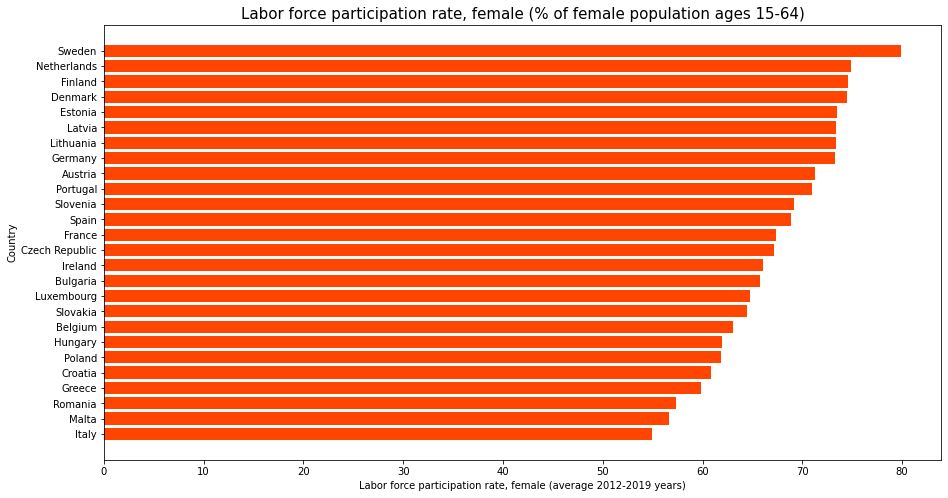

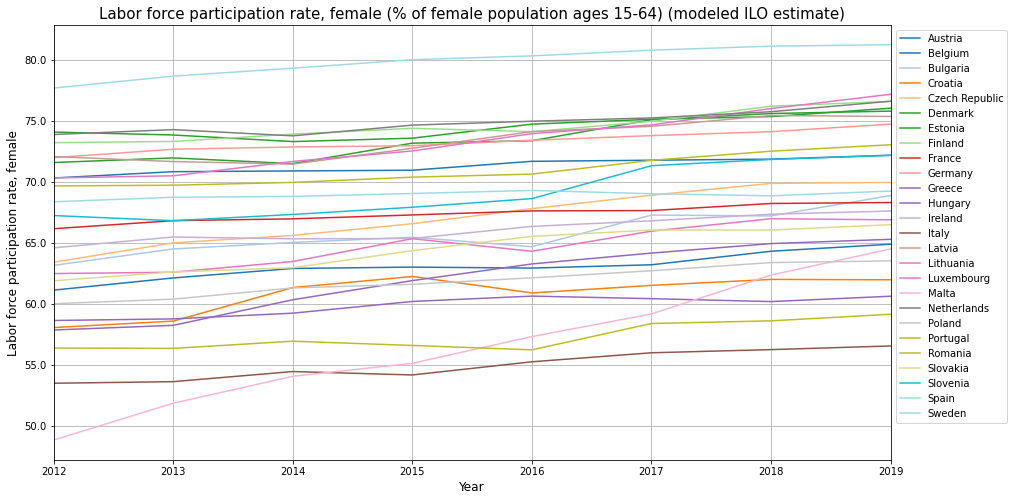

In [32]:
#Exclude Subregion column
labor_female = gender_statistics1.drop('Subregion', axis=1)

#Get only results from "Labor force participation rate, female (% of female population ages 15-64)" indicator
labor_female = labor_female.xs('Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)',level='Indicators')

#Get the mean of results of all years of each country
labor_female = labor_female['Statistics'].groupby(level=['Country']).mean()

#Sort values by ascending order
labor_female = labor_female.sort_values(ascending=True)

#Bar plot
plt.figure(figsize=(15,8))
plt.barh(labor_female.index,labor_female.values,color='orangered')
plt.xlabel('Labor force participation rate, female (average 2012-2019 years)')
plt.ylabel('Country')
plt.title ('Labor force participation rate, female (% of female population ages 15-64)', fontsize=15)
plt.show()


#Exclude Subregion column
labor_female = gender_statistics1.drop('Subregion', axis=1)

#Get only results from "Labor force participation rate, female (% of female population ages 15-64)" indicator
labor_force_female = labor_female.xs('Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)',level='Indicators').unstack()

#Line plot
ax = labor_force_female['Statistics'].plot(grid=True, colormap='tab20', figsize=[15,8]) 
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1)) 
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_title('Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)',fontsize=15)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Labor force participation rate, female', fontsize=12)
plt.show()

We can observe that, among European Union countries, Sweden has the greatest female labour participation rate (nearly 80%), on average, between 2012 and 2019, implying that it has the most females in the  job market and actively looking for work. Malta, Romania, and Italy, on the other hand, have the lowest female labour participation rates (all around 55%). This disparity could be due to differences in economic incentives and rates  related to  each country's educational levels. According to the Organization for Economic Co-operation and Development (OECD), Sweden's big number is due  to the high percentages of females completing secondary education and opting for higher education, as well as the fact that Sweden has significantly  invested in a continum of work-family supports for families throughout early and middle childhood (including parental leave, pre-school, and out-of-school hours care). In Italy, for example, unlike Sweden, there is a lack of access to high-quality, inexpensive childcare, there is barely a quarter of children (0-2 years) in formal childcare in Italy. Furthermore, we can see that female labour force participation is increasing in most countries, and while Malta has one of the lowest rates of female labour force participation, it is also the country with the highest rate of growth. According to a research by the Central Bank of Malta, the significante growth is  due to the fact that the level of education of the Maltese female labour force has increased dramatically over time when compared to the euro area average.



#### Male 

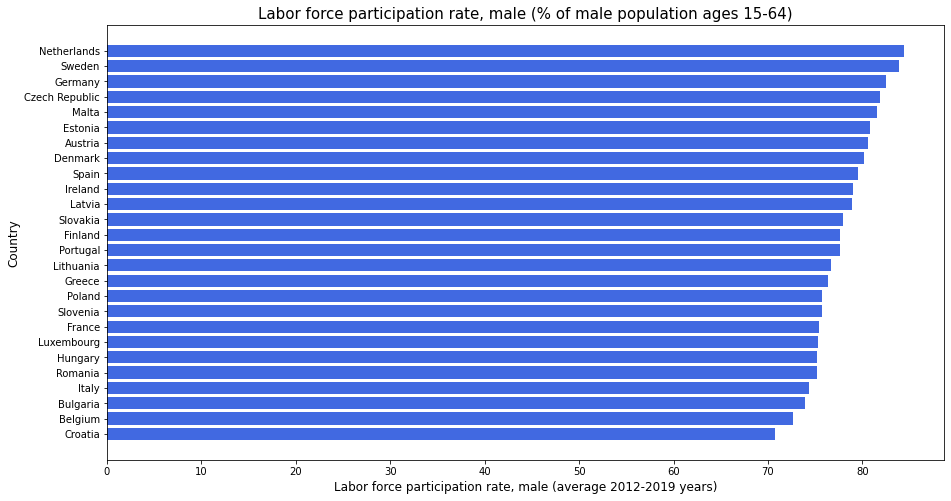

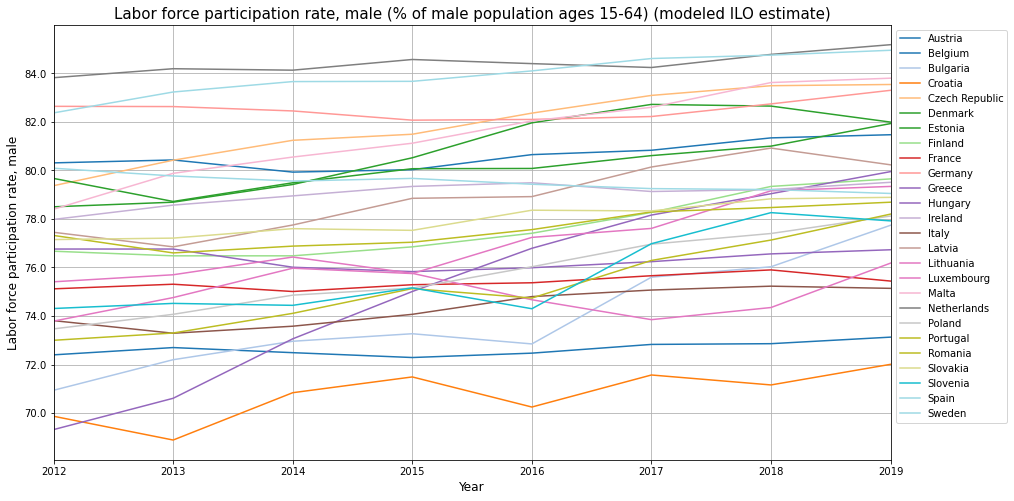

In [33]:
#Exclude Subregion column
labor_male = gender_statistics1.drop('Subregion', axis=1)

#Get only results from "Labor force participation rate, male (% of male population ages 15-64)" indicator
labor_male = labor_male.xs('Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)',level='Indicators')

#Get the mean of results of all years of each country
labor_male = labor_male['Statistics'].groupby(level=['Country']).mean()

#Sort values by ascending order
labor_male = labor_male.sort_values(ascending=True)

# Bar plot
plt.figure(figsize=(15,8))
plt.barh(labor_male.index,labor_male.values, color='royalblue')
plt.xlabel('Labor force participation rate, male (average 2012-2019 years)',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title ('Labor force participation rate, male (% of male population ages 15-64)', fontsize=15)
plt.show()


#Exclude Subregion column
labor_male = gender_statistics1.drop('Subregion', axis=1)

#Get only results from "Labor force participation rate, male (% of male population ages 15-64)" indicator
labor_force_male = labor_male.xs('Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)',level='Indicators').unstack()

#Line plot
ax = labor_force_male['Statistics'].plot(grid=True, colormap='tab20', figsize=[15,8]) 
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1)) 
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_title('Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)',fontsize=15)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Labor force participation rate, male', fontsize=12)
plt.show()

Male labour force participation rates are greater than female labour force participation rates in most countries, particularly Malta, which is among the top three countries, with higher rates on average between 2012 and 2019 (around 80%), which contrasts sharply with the picture for women. In terms of the trend over time, most countries' curves show sharp fluctuations, which may be attributed to different periods of economic crises in the European Union, according to studies from the European Commission.

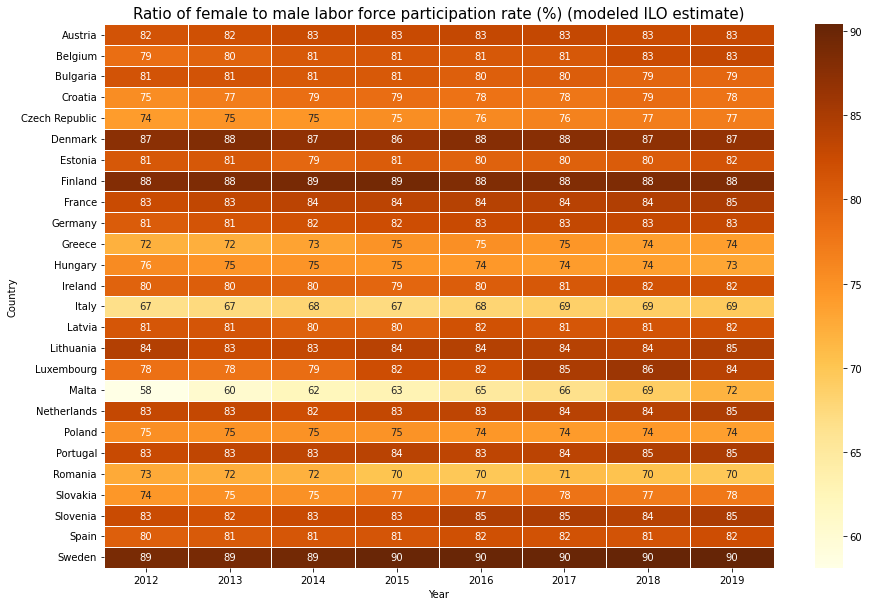

In [34]:
#Exclude Subregion column
ratio = gender_statistics1.drop('Subregion', axis=1)

#Get only results from "Ratio of female to male labor force participation rate (%) (modeled ILO estimate)" indicator
ratio_female_to_male = ratio.xs('Ratio of female to male labor force participation rate (%) (modeled ILO estimate)',level='Indicators')

#Heatmap
plt.figure(figsize=(15,10))
plt.title('Ratio of female to male labor force participation rate (%) (modeled ILO estimate)', fontsize=15)
heatmap1_data = pd.pivot_table(ratio_female_to_male, values='Statistics', 
                     index=['Country'], 
                     columns='Year')
sns.heatmap(heatmap1_data, annot=True, linewidths=0.5, cmap='YlOrBr')
plt.show()

Taking into account that the indicator "Female and male labor force participation rate (%)" is calculated by dividing the female labor force participation rate by the male labor force participation rate and multiplying by 100, this heatmap confirmed all of what was concluded previously, such as the fact that women have been participating more in the labour market over time, what is emphasised  by the difference of the values of this ratio in the years 2012 and 2019 in most countries.

### 3.2. Is there a trend for females to assume roles of employers and self-employed labourers throughout the time? And compared to males?

#### Self-employed rates

#### Female

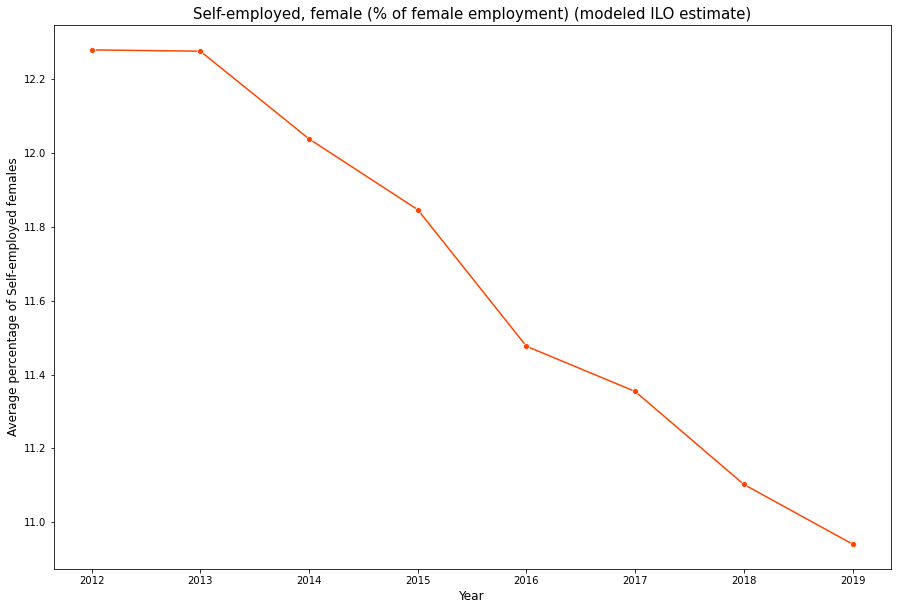

In [35]:
#Exclude Subregion column
self_employed_female = gender_statistics1.drop('Subregion', axis=1)

#Get only results from "Self-employed, female (% of female employment) (modeled ILO estimate)" indicator
self_employed_female  = self_employed_female.xs('Self-employed, female (% of female employment) (modeled ILO estimate)',level='Indicators')

#Get the mean of all years 
self_employed_female  = self_employed_female ['Statistics'].groupby(level=['Year']).mean()
self_employed_female

#To avoid an error when ploting because Year array is a period, I needed to convert it to string 
year = self_employed_female.index.to_series().astype(str).tolist()
self_employed_female_mean = self_employed_female.values.tolist()

#Create dataframe 
df = pd.DataFrame()
df['year'] = year
df['self_employed_female_mean'] = self_employed_female_mean

#Line plot
plt.figure(figsize=(15,10))
ax = sns.lineplot(data=df, x='year', y='self_employed_female_mean', marker = 'o', color='orangered')
ax.set_title('Self-employed, female (% of female employment) (modeled ILO estimate)', fontsize=15)
ax.set_ylabel('Average percentage of Self-employed females', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
plt.show()

#### Male

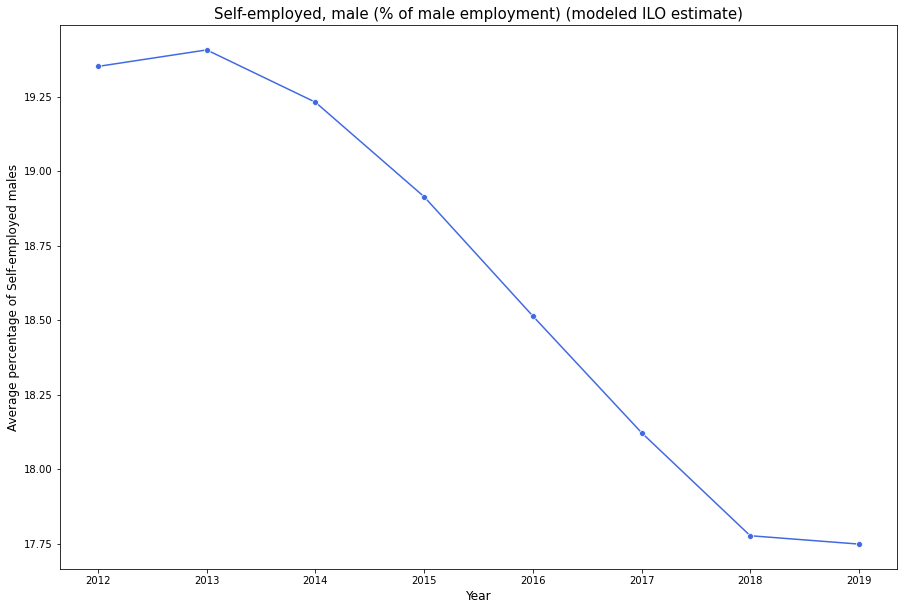

In [36]:
#Exclude Subregion column
self_employed_male = gender_statistics1.drop('Subregion', axis=1)

#Get only results from "Self-employed, male (% of male employment) (modeled ILO estimate)" indicator
self_employed_male  = self_employed_male.xs('Self-employed, male (% of male employment) (modeled ILO estimate)',level='Indicators')

#Get the mean of all years 
self_employed_male  = self_employed_male ['Statistics'].groupby(level=['Year']).mean()
self_employed_male

#To avoid an error when ploting because Year array is a period, I needed to convert it to string 
year = self_employed_male.index.to_series().astype(str).tolist()
self_employed_male_mean = self_employed_male.values.tolist()

#Create dataframe 
df = pd.DataFrame()
df['year'] = year
df['self_employed_male_mean'] = self_employed_male_mean

#Line plot
plt.figure(figsize=(15,10))
ax = sns.lineplot(data=df, x='year', y='self_employed_male_mean', marker = 'o', color='royalblue')
ax.set_title('Self-employed, male (% of male employment) (modeled ILO estimate)', fontsize=15)
ax.set_ylabel('Average percentage of Self-employed males', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
plt.show()

We may detect a downward trend curve in both genders when it comes to self-employed rate. There is a trend toward less and fewer men and women earning a living from any independent economic activity. It is worth noting that, while the slope of the curves seems very sharp when looking at the plots, the y axis shows that the decrease has been gradual. Despite policymakers' efforts to encourage more people to start their own businesses and become self-employed, according to Eurofound, the declining trend is due to the fact that self-employed people often have less social protection than most forms of dependent employment  as well as  the climate of uncertainty surrounding self-employment success and failure. All of this has discouraged people from working on their own.

#### Employers rate,  female vs male

In [37]:
#Exclude Subregion column
employers_female = gender_statistics1.drop('Subregion', axis=1)

#Get only results from "Employers, female (% of female employment) (modeled ILO estimate)" Indicator
employers_female  = employers_female.xs('Employers, female (% of female employment) (modeled ILO estimate)',level='Indicators')

#Get the mean of all years 
employers_female  = employers_female ['Statistics'].groupby(level=['Year']).mean()
employers_female

#To avoid an error when ploting because Year array is a period, I needed to convert it to string 
year = employers_female.index.to_series().astype(str).tolist()
employers_female_mean = employers_female.values.tolist()

#Create dataframe 
df = pd.DataFrame()
df['year'] = year
df['employers_female_mean'] = employers_female_mean


#Exclude Subregion column
employers_male = gender_statistics1.drop('Subregion', axis=1)

#Get only results from "Employers, male (% of male employment) (modeled ILO estimate)" Indicator
employers_male  = employers_male.xs('Employers, male (% of male employment) (modeled ILO estimate)',level='Indicators')

#Get the mean of all years 
employers_male  = employers_male ['Statistics'].groupby(level=['Year']).mean()
employers_male

#To avoid an error when ploting because Year array is a period, I needed to convert it to string 
year = employers_male.index.to_series().astype(str).tolist()
employers_male_mean = employers_male.values.tolist()

#Add columns of male to the dataframe
df['employers_male_mean'] = employers_male_mean

#Show dataframe
df

year  employers_female_mean  employers_male_mean
0  2012               2.296923             5.700000
1  2013               2.302692             5.689615
2  2014               2.243846             5.701538
3  2015               2.360000             5.694615
4  2016               2.421154             5.657308
5  2017               2.404615             5.649615
6  2018               2.328846             5.506154
7  2019               2.350769             5.539615

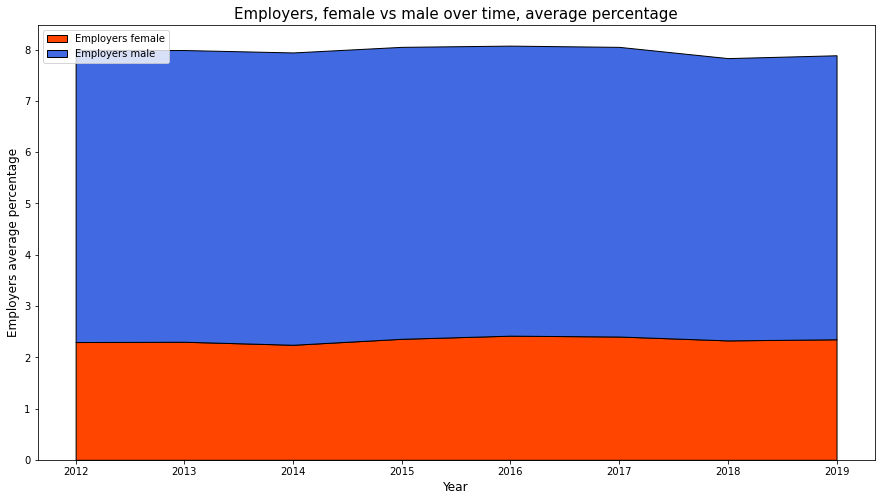

In [38]:
#Define x and y
x = df['year']
y = np.vstack([df['employers_female_mean'],df['employers_male_mean']])

#Labels for each stack
labels = ['Employers female', 'Employers male']

#Colors for each stack
colors = ['orangered','royalblue']

#Stack plot
plt.figure(figsize=(15,8))
plt.stackplot(x,y,
              labels=labels,
              colors=colors,
              edgecolor='black')
plt.legend(loc=2)
plt.title('Employers, female vs male over time, average percentage', fontsize=15)
plt.ylabel('Employers average percentage',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.show()

We can see that, on average, the curves for both men and women related to the rate of employers have remained steady throughout time. However, we can see that the proportion of females as employers is considerably lower than that males. One explanation for this fenomenon, according to a BBC article, may be described simply as gender bias. It's common for leadership views to default to male behaviour stereotypes, leading to unconsciously perceive it with some kind of prejudice.

### 3.3. Which European Union's countries have the largest and lowest employment and earnings discrepancies between genders? What has been the trend throughout the time?

#### Gender Pay Gap

In [39]:
#Dataframe made in advance
gender_pay_gap.head()

Year                         Indicators  Country       Subregion  \
0  2012  Gender pay gap in unadjusted form  Austria  Western Europe   
1  2013  Gender pay gap in unadjusted form  Austria  Western Europe   
2  2014  Gender pay gap in unadjusted form  Austria  Western Europe   
3  2015  Gender pay gap in unadjusted form  Austria  Western Europe   
4  2016  Gender pay gap in unadjusted form  Austria  Western Europe   

   Statistics  
0        22.9  
1        22.3  
2        22.2  
3        21.8  
4        20.8

In [40]:
#Dataframe made in advance
iso_codes.head()

Country Name Country Code
0      Austria          AUT
1      Belgium          BEL
2     Bulgaria          BGR
3      Croatia          HRV
4       Cyprus          CYP

In [41]:
iso_codes = iso_codes.rename(columns={'Country Name':'Country'})
iso_codes['Country'].replace({'Germany (until 1990 former territory of the FRG)':'Germany','Czechia':'Czech Republic','Slovak Republic':'Slovakia'},inplace=True)

In [42]:
#Repetion of country name would affect merge, so it is necessary to create a dataframe with unique values
country = iso_codes['Country'].unique().tolist()
code = iso_codes['Country Code'].unique().tolist()

#Create dataframe 
df = pd.DataFrame()
df['Country'] = country
df['Code'] = code

#Merge
gender= pd.merge(df,gender_pay_gap ,on='Country')

#Plot Choropleth Map
fig = px.choropleth(gender , locations='Code',
                    color='Statistics',
                    hover_name='Country',
                    animation_frame='Year',
                    title = 'Gender pay gap in unadjusted form',    
                    scope ='europe',
                    color_continuous_scale=px.colors.sequential.Greens)
 
fig["layout"].pop("updatemenus")
fig.show()


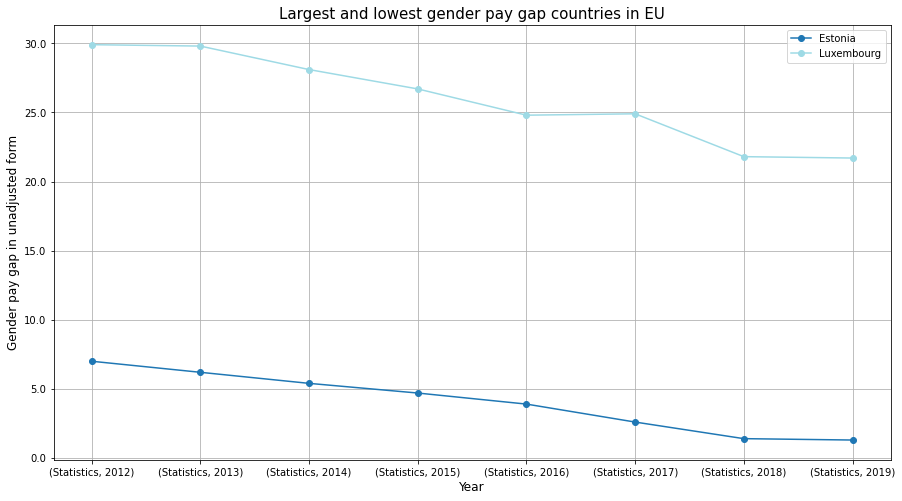

In [43]:
#Exclude Subregion column
pay_gap = gender_statistics1.drop('Subregion', axis=1)

#Get only results from "Gender pay gap in unadjusted form" indicator and the countries wanted
luxembourg = pay_gap.xs(['Gender pay gap in unadjusted form', 'Luxembourg'],level=['Indicators','Country']).unstack()
estonia = pay_gap.xs(['Gender pay gap in unadjusted form','Estonia'],level=['Indicators','Country']).unstack()

#Put the 2 series in a dataframe, different columns
luxembourg_estonia =  pd.concat([luxembourg,estonia], axis=1)

#Rename columns
luxembourg_estonia.rename(columns={0:'Estonia', 1:'Luxembourg'}, inplace=True)

#Line plot
ax = luxembourg_estonia[['Estonia','Luxembourg']].plot(grid=True, colormap='tab20', figsize=[15,8], marker = 'o') 
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1)) 
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_title('Largest and lowest gender pay gap countries in EU',fontsize=15)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Gender pay gap in unadjusted form', fontsize=12)
ax.fill(
    interpolate=True, color="red", alpha=0.25, 
    label="Positive")
plt.show()

Taking into account that the indicator "Gender pay gap in unadjusted form" is the difference between the average gross hourly earnings of men and women expressed as a percentage of the average gross hourly earnings of men, when we look at the map, we can see that the gender pay gap has been shrinking in most countries over the years, some quicker than others, with some exceptions (Latvia), which leads to a general trend of decreasing the gender pay gap in the European Union as a whole. This tendency may be related to the fact that in September 2015, 80 world leaders agreed to ending gender discrimination by 2030 and defined concrete and quantifiable strategies to begin fundamental reforms in their respective countries at the United Nations Committee. Governments were urged to establish national commitments to address challenges that inhibit females  from reaching their full potential. While no member country has totally eliminated the pay gap between men and women, the situation in the EU is generally better than in other parts of the world and is constantly improving.
Furthermore, we see that the gender pay gap is higher in Estonia, but that it has been rapidly decreasing over the years, from 30 % to 25 % in 2019, and lower in Luxembourg, making this country the one with the smallest wage disparity between men and women, with values below 10% in all years. Different employment and job positions, shorter work experience, and lower work load can all contribute to salary disparities in Estonia, according to research by the European Social Fund. Additional factors that contribute to the gender wage gap include interruptions in work life owing to raising small children, as well as differences in specialty and education across workers. On the other side, the gender wage gap is viewed as a societal issue that stems from greater prejudice and is the outcome of collective bargaining.

#### Gender Employment Gap

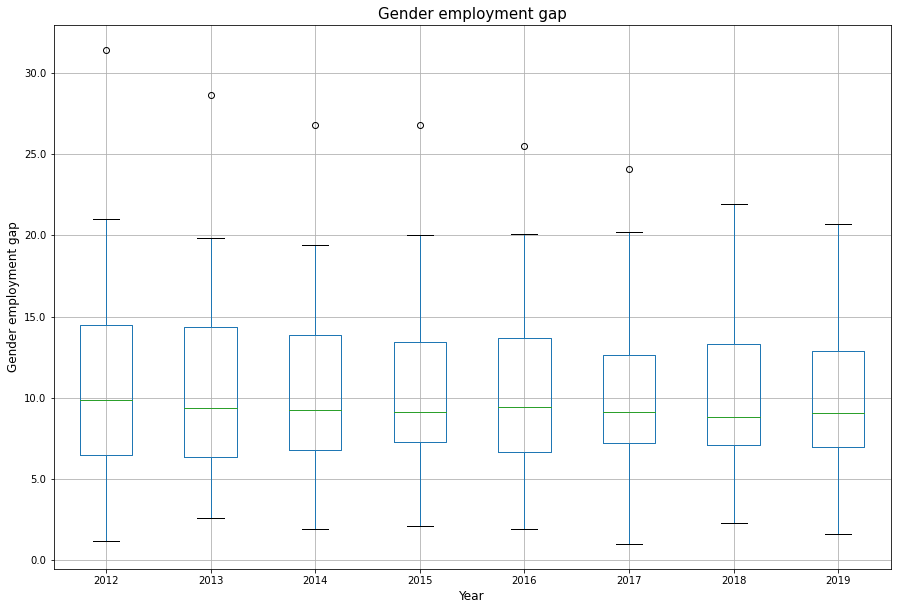

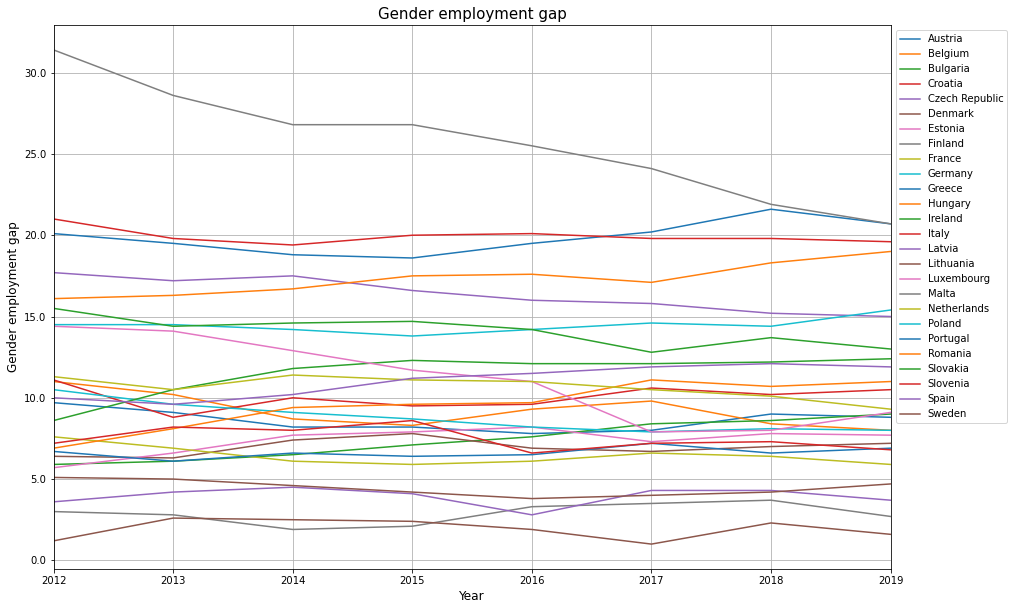

In [44]:
#Exclude Subregion column
gender_employment_gap = gender_statistics1.drop('Subregion', axis=1)

#Get only results from "Gender employment gap" indicator
employment_gap = gender_employment_gap.xs('Gender employment gap',level='Indicators').unstack()

#Line plot
ax = employment_gap['Statistics'].T.boxplot(grid=True, figsize=[15,10]) #employment_gap['Statistics'].T to transpose and have my years as columns in order to be possible to see the distribution
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1)) 
ax.set_title('Gender employment gap',fontsize=15)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Gender employment gap', fontsize=12)
plt.show()


#Exclude Subregion column
gender_employment_gap = gender_statistics1.drop('Subregion', axis=1)

#Get only results from "Gender employment gap" indicator
gender_employment_gap = gender_employment_gap.xs('Gender employment gap',level='Indicators').unstack()

#Line plot
ax = gender_employment_gap['Statistics'].plot(grid=True, figsize=[15,10]) 
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1)) 
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_title('Gender employment gap',fontsize=15)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Gender employment gap', fontsize=12)
plt.show()

Given that the "Gender Employment Gap" is defined as the difference between men and women's employment rates between the ages of 20 and 64, we can see that, in terms of the average distribution of Gender Employment Gap percentages between 2012 and 2019, we can observe that 2017 has the lowest percentages, followed by 2019 and 2015. There is also  some outliers, data points that were significantly higher than the majority of percentages observed up to Q3 (75 % of the observations) in all of these years.  Finally,  We see that all of the years are close to a normal distribution, apart from 2018 and 2015, which have more dispersed values, indicating some skewness. However,  when comparing all of the years, the percentages appear to be in roughly the same range of values.

The second graphic clearly shows that Malta is our outlier, with the largest gender employment disparity in recent years, despite the fact that these numbers have been rapidly reducing over time.


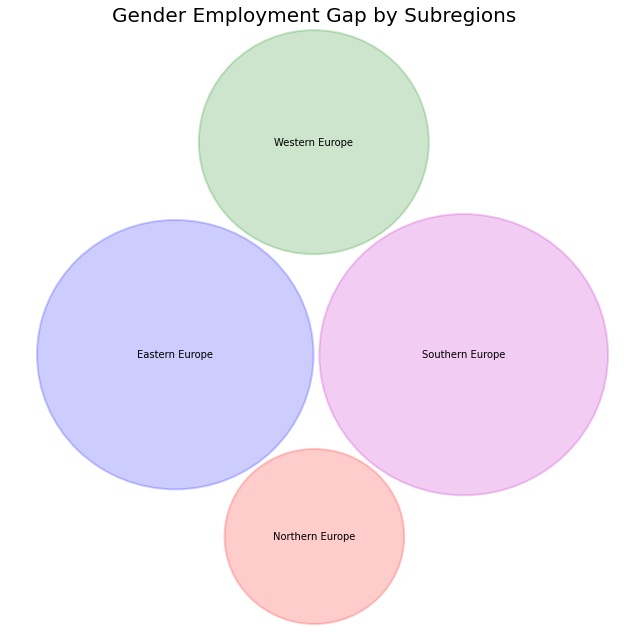

In [45]:
#Exclude Country column
gender_employment_gap = gender_statistics2.drop('Country', axis=1)

#Get only results from "Gender employment gap" indicator
employment_gap = gender_employment_gap.xs('Gender employment gap',level='Indicators')

#Get the mean of all Subregions
employment_gap   = employment_gap['Statistics'].groupby(level=['Subregion']).mean()

#Compute circle positions:
circles = circlify.circlify(
    employment_gap.sort_values(ascending=True).values.tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1))

#Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(11,11))

#Title
ax.set_title('Gender Employment Gap by Subregions',fontsize=20)

#Remove axes
ax.axis('off')

#Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

#List of labels
labels = employment_gap.sort_values(ascending=True).index.tolist()

#Print circles
for circle, label, c in zip(circles, labels,'rgbmkrgbmk'):
    x, y, r = circle
    ax.add_patch(plt.Circle((x,y),r*0.98, color=c, alpha=0.2,linewidth=2))
    plt.annotate(
          label, 
          (x,y) ,
          va='center',
          ha='center'
     )

In terms of sub-regions, we can see that the Northern European sub-region has the lowest value of gender employment inequality, which may be due to the fact that two of the six Northern countries of the European Union, Denmark and Sweden, are among the only six countries in the world, according to the World Bank, to enshrine gender equality in labour laws. Western Europe is in second place, while Eastern and Southern Europe are at the bottom of the podium,  with fairly similar percentages, and are part of the countries, the majority of them, that have the lowest labor force participation rates for both males and females.

### 3.4. Is there a gap in unemployment rates between males and females? What about advanced education level?


In [46]:
#Exclude Subregion column
tertiary = gender_statistics1.drop('Subregion', axis=1)

#Get only results from "School enrollment, tertiary (% gross)" indicator
tertiary  = tertiary.xs('School enrollment, tertiary (% gross)',level='Indicators')

#Get the mean of all years 
tertiary  = tertiary ['Statistics'].groupby(level=['Year']).mean()

#To avoid an error when ploting because Year array is a period, I needed to convert it to string 
year = tertiary.index.to_series().astype(str).tolist()
tertiary = tertiary.values.tolist()

#Create dataframe 
tertiary_df = pd.DataFrame()
tertiary_df['Year'] = year
tertiary_df['School enrollment, tertiary'] = tertiary




#Exclude Subregion column
unemployment = gender_statistics1.drop('Subregion', axis=1)

#Get only results from "Unemployment, total (% of total labor force) (modeled ILO estimate)" indicator
unemployment  = unemployment.xs('Unemployment, total (% of total labor force) (modeled ILO estimate)',level='Indicators')

#Get the mean of all years 
unemployment  = unemployment['Statistics'].groupby(level=['Year']).mean()

#To avoid an error when ploting because Year array is a period, I needed to convert it to string 
year = unemployment.index.to_series().astype(str).tolist()
unemployment = unemployment.values.tolist()

#Create dataframe 
unemployment_df = pd.DataFrame()
unemployment_df['Year'] = year
unemployment_df['Unemployment'] = unemployment

#Merge the two dataframe on year
df = pd.merge(unemployment_df,tertiary_df, on='Year')

#Show dataframe
df.head()

Year  Unemployment  School enrollment, tertiary
0  2012     10.884615                    68.599045
1  2013     11.104231                    68.239554
2  2014     10.438462                    67.926356
3  2015      9.596154                    67.904431
4  2016      8.647692                    68.458874

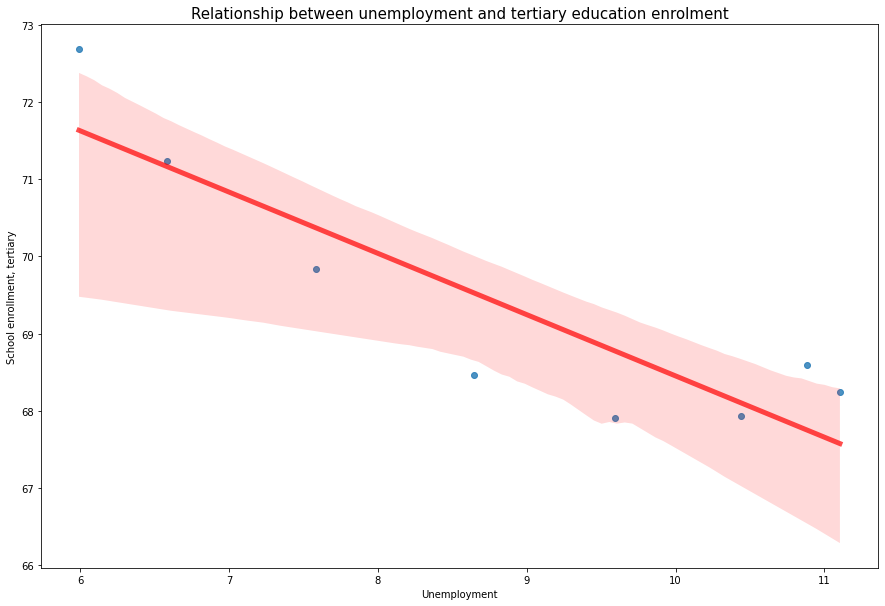

In [47]:
#Scatterplot
fig, ax = plt.subplots(figsize = (15, 10))
sns.regplot(x=df['Unemployment'], y=df['School enrollment, tertiary'], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title('Relationship between unemployment and tertiary education enrolment', fontsize=15)
plt.show()

Looking at the scatterplot, the data shows a downhill pattern as we move from left to right, indicating a negative relationship  between higher education enrolment and unemployment rates, meaning that the larger the percentage of tertiary education enrolments, the lower the unemployment  rates. The negative slope and the  downward trend curve are evidences of this.

##### Note Tertiary education, also referred to as third-level, third-stage or post-secondary education, is the educational level following the completion of secondary education.

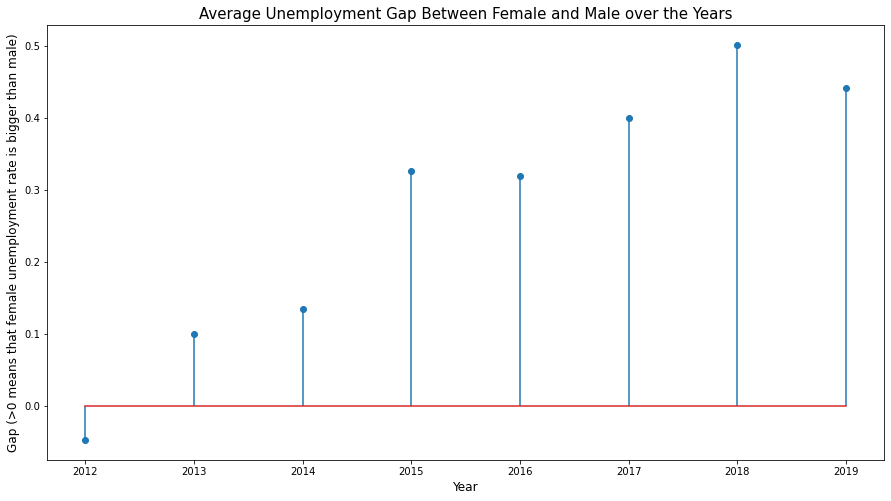

In [48]:
#Exclude Subregion column
unemployment_male = gender_statistics1.drop('Subregion', axis=1)

#Get only results from "Unemployment, male (% of male labor force) (modeled ILO estimate)" indicator
unemployment_male  = unemployment_male.xs('Unemployment, male (% of male labor force) (modeled ILO estimate)',level='Indicators')

#Get the mean of all years 
unemployment_male  = unemployment_male ['Statistics'].groupby(level=['Year']).mean()

#To avoid an error when ploting because Year array is a period, I needed to convert it to string 
year = unemployment_male.index.to_series().astype(str).tolist()
unemployment_male = unemployment_male.values.tolist()

#Create dataframe 
unemployment_male_df = pd.DataFrame()
unemployment_male_df['Year'] = year
unemployment_male_df['Unemployment, male'] = unemployment_male

#Exclude Subregion column
unemployment_female = gender_statistics1.drop('Subregion', axis=1)

#Get only results from "Unemployment, female (% of female labor force) (modeled ILO estimate)" indicator
unemployment_female  = unemployment_female.xs('Unemployment, female (% of female labor force) (modeled ILO estimate)',level='Indicators')

#Get the mean of all years 
unemployment_female  = unemployment_female ['Statistics'].groupby(level=['Year']).mean()

#Error ploting cause Year array is a period, so need to convert to string or int
year = unemployment_female.index.to_series().astype(str).tolist()
unemployment_female = unemployment_female.values.tolist()

#Create dataframe 
unemployment_female_df = pd.DataFrame()
unemployment_female_df['Year'] = year
unemployment_female_df['Unemployment, female'] = unemployment_female

#Merge the two dataframe on year
df = pd.merge(unemployment_female_df,unemployment_male_df, on='Year')

#Add Gap column
df['Gap (>0 means that female unemployment rate is bigger than male)']= df['Unemployment, female'] -  df['Unemployment, male'] 

#Lollipop plot
plt.figure(figsize=(15,8))
plt.stem(df['Year'],df['Gap (>0 means that female unemployment rate is bigger than male)'])
plt.title('Average Unemployment Gap Between Female and Male over the Years', fontsize=15)
plt.ylabel('Gap (>0 means that female unemployment rate is bigger than male)',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.show()


With the exception of 2012, the unemployment rate of female has consistently been greater than that of males over the years. According to an International Labor Organization (ILO), females face gender bias and are concentrated in areas of the economy that are most vulnerable to economic fluctuations, as a result, they are overrepresented in the informal economy and are limited or do not have access to services that allow them to stabilize their professional and family life.

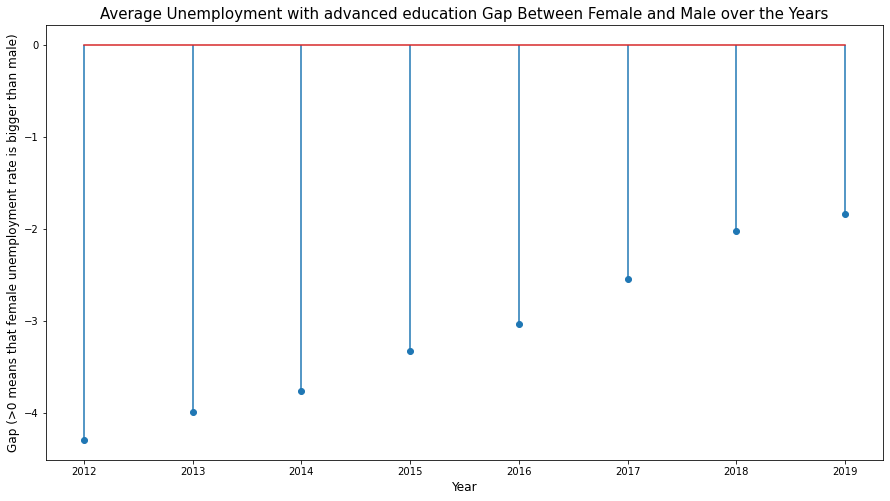

In [49]:
#Exclude Subregion column
unemployment_female_tertiary = gender_statistics1.drop('Subregion', axis=1)

#Get only results from "Unemployment with advanced education, female (% of female labor force with advanced education)" indicator
unemployment_female_tertiary = unemployment_female_tertiary.xs('Unemployment with advanced education, female (% of female labor force with advanced education)',level='Indicators')

#Get the mean of all years 
unemployment_female_tertiary  = unemployment_female_tertiary ['Statistics'].groupby(level=['Year']).mean()

#To avoid an error when ploting because Year array is a period, I needed to convert it to string 
year = unemployment_female_tertiary.index.to_series().astype(str).tolist()
unemployment_female_tertiary = unemployment_female_tertiary.values.tolist()

#Create dataframe 
unemployment_female_tertiary_df = pd.DataFrame()
unemployment_female_tertiary_df['Year'] = year
unemployment_female_tertiary_df['Unemployment with advanced education, female'] = unemployment_female_tertiary

#Exclude Subregion column
unemployment_male_tertiary = gender_statistics1.drop('Subregion', axis=1)

#Get only results from "Unemployment, male (% of male labor force) (modeled ILO estimate)" indicator
unemployment_male_tertiary  = unemployment_male_tertiary.xs('Unemployment, male (% of male labor force) (modeled ILO estimate)',level='Indicators')

#Get the mean of all years 
unemployment_male_tertiary  = unemployment_male_tertiary['Statistics'].groupby(level=['Year']).mean()

#To avoid an error when ploting because Year array is a period, I needed to convert it to string 
year = unemployment_male_tertiary.index.to_series().astype(str).tolist()
unemployment_male_tertiary = unemployment_male_tertiary.values.tolist()

#Create dataframe 
unemployment_male_tertiary_df = pd.DataFrame()
unemployment_male_tertiary_df['Year'] = year
unemployment_male_tertiary_df['Unemployment with advanced education, male'] = unemployment_male_tertiary

#Merge the two dataframe on year
df = pd.merge(unemployment_female_tertiary_df,unemployment_male_tertiary_df, on='Year')

#Add Gap column
df['Gap (>0 means that female unemployment rate is bigger than male)']= df['Unemployment with advanced education, female'] -  df['Unemployment with advanced education, male'] 

#Lollipop plot
plt.figure(figsize=(15,8))
plt.stem(df['Year'],df['Gap (>0 means that female unemployment rate is bigger than male)'])
plt.title('Average Unemployment with advanced education Gap Between Female and Male over the Years', fontsize=15)
plt.ylabel('Gap (>0 means that female unemployment rate is bigger than male)',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.show()


When we look at the "Unemployment with Advanced Education" indicator, we observe a situation that is much different from what we've just described. In terms of unemployment rates that take advanced education into consideration, females have had lower unemployment rates than males, on average,  over the years. This is consistent with the findings of the previous plot on the relationship between higher education enrollment and unemployment rates, namely that as education levels rise, unemployment falls and the gap between men and women reduces, and in the case tertiary education, female unemployment rate, in average, over the years is even lower than that of men.

### 4. Conclusion and evaluation

In terms of the key findings, we can state that, in general, European Union countries have been integrating more women into the workforce, and that the salary and employability difference between men and women has narrowed. There are certain countries that are still lagging behind the rest, such as Malta, yet these countries have made significant strides in general. In terms of self-employment, we've seen that many men and women have been discouraged from starting their own businesses over time, owing to a lack of social safety and uncertainty regarding their business' success. Finally, we discovered that education has a negative relationship with unemployment, with an increase in the percentage of people with a higher education resulting in lower unemployment rates. Surprisingly, we discovered that, in general,  women with advanced education are less likely than men to be unemployed in the European Union.

In terms of the work itself, I believe that the entire data gathering procedure was carried out in a logical manner, with indicators extracted that allowed me to answer my research questions succinctly; Additionally, the resources employed to extract these indicators differed. However, when extracting data, I discovered that some indicators that I thought were important had missing values for the majority of countries and years, preventing me from included them in my analysis, which I believe was a drawback and something that should be addressed in the future.I  believe I have provided a diverse range of visualisations, ranging from basic plots (bar plot and scatterplot) to advanced plots like the interactive map (Choropleth Map), time series, and bubble plot, among others. The fact that I worked with time-series and the  attempt to diversify my visualisations as a way escape the conventional were the biggest challenges of this project.


### 5. References

#### Data collection:
- https://www.worldbank.org/en/about
- https://databank.worldbank.org/home.aspx
- https://ec.europa.eu/eurostat/web/main/data/database
- https://www.worldometers.info/geography/how-many-countries-in-europe/
- https://www.un.org/youthenvoy/2013/07/un-women-the-united-nations-entity-for-gender-equality-and-the-empowerment-of-women/

#### Research Question 1:
- https://ec.europa.eu/info/sites/default/files/european-semester_thematic-factsheet_labour-force-participation-women_en_0.pdf 
- https://ec.europa.eu/eurostat/web/products-eurostat-news/-/EDN-20200306-1
-https://ec.europa.eu/info/sites/default/files/aid_development_cooperation_fundamental_rights/annual_report_ge_2018_en.pdf
- https://www.oecd.org/italy/Gender2017-ITA-en.pdf
- https://www.un.org/sustainabledevelopment/gender-equality/
- https://www.oecd.org/sweden/Closing%20the%20Gender%20Gap%20-%20Sweden%20FINAL.pdf 
- https://www.centralbankmalta.org/file.aspx?f=72432#:~:text=This%20effort%20succeeded%20to%20increase,increase%20of%2025.7%20percentage%20points.&text=average%20of%2067.7%25%20in%202017,to%20the%20euro%20area%20average.

#### Research Question 2:
- https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Archive:Labour_market_statistics_-_professional_status&oldid=504737
- https://journals.sagepub.com/doi/abs/10.1177/09500170211035316
- http://lnu.diva-portal.org/smash/get/diva2:1221270/FULLTEXT01.pdf
- http://www.unwomen.org/en/what-we-do/leadership-and-political-participation/facts-and-figures) 
- https://www.european-microfinance.org/sites/default/files/document/file/exploring-self-employment-in-the-european-union.pdf
- https://www.bbc.com/worklife/article/20210108-why-do-we-still-distrust-women-leaders

#### Research Question 3:
- https://www.ilo.org/infostories/en-GB/Stories/Employment/barriers-women#women-preference
- https://www.ilo.org/infostories/en-GB/Stories/Employment/barriers-women#unemployed-vulnerable/map-labour-force
- https://www.sm.ee/sites/default/files/content-editors/Ministeerium_kontaktid/Valjaanded/gender_pay_gap_estonia_analysis.pdf
- https://www.oecd.org/sweden/Closing%20the%20Gender%20Gap%20-%20Sweden%20FINAL.pdf
- https://www.theguardian.com/global-development/2019/mar/01/only-six-countries-in-the-world-give-women-and-men-equal-legal-rights#:~:text=2%20years%20old-,Only%20six%20countries%20in%20the%20world%20give,men%20equal%20legal%20work%20rights&text=If%20you're%20a%20woman,%2C%20Latvia%2C%20Luxembourg%20or%20Sweden.&text=Each%20country%20was%20scored%20and,100%20indicating%20the%20most%20equal.

#### Research Question 4:
- https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Gender_pay_gap_statistics